# An√°lisis de Datos - Bitcoin Tweets

En este notebook, continuamos con el an√°lisis del dataset de tweets relacionados con Bitcoin, el cual hemos procesado anteriormente en `data_extractor.py`. El procesamiento incluy√≥ la limpieza de datos, eliminaci√≥n de URLs, menciones, hashtags y caracteres especiales, as√≠ como la normalizaci√≥n de las palabras para facilitar su an√°lisis.

Ahora que el dataset ha sido procesado, nos enfocaremos en el an√°lisis de los datos a trav√©s de diversas visualizaciones y gr√°ficos. El objetivo de este an√°lisis es explorar la frecuencia de las palabras clave, identificar tendencias en los datos y obtener insights relevantes sobre c√≥mo se menciona Bitcoin en las redes sociales.

El an√°lisis incluir√°:

1. **Generaci√≥n de Nube de Palabras**: Visualizaci√≥n de las palabras m√°s frecuentes en los tweets.
2. **Estudio de Tendencias**: Identificaci√≥n de patrones en las menciones de Bitcoin y otros t√©rminos relacionados con criptomonedas.
3. **Exploraci√≥n de Correlaciones**: Posibles relaciones entre las menciones de Bitcoin y su precio, adem√°s de otros factores clave presentes en los datos.

A lo largo de este notebook, utilizaremos herramientas de visualizaci√≥n como gr√°ficas y nubes de palabras para facilitar la comprensi√≥n de los datos y detectar patrones relevantes.

### Importaci√≥n de Librer√≠as

In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud import WordCloud, STOPWORDS
from data_extractor import DataExtractor

### Preparaci√≥n de los datos

In [2]:
# Configuramos el estilo de gr√°ficos
sns.set(style='darkgrid')
plt.rcParams['font.family'] = 'Segoe UI Emoji'

In [3]:
# Cargamos procesamos los datos
extractor = DataExtractor('data/Bitcoin_tweets_dataset_2.csv')
df = extractor.process_text()
extractor.save_file('data/dataset_procesado')
print('Dataset procesado correctamente')

Dataset procesado correctamente


In [4]:
# Mostramos las primeras filas del dataframe
display(df.head())

user_name                                               text  \
0        ChefSam  Which #bitcoin books should I think about read...   
1          Roy‚ö°Ô∏è  @ThankGodForBTC I appreciate the message, but ...   
2  Ethereum Yoda  #Ethereum price update: \n\n#ETH $1664.02 USD\...   
3        Viction  CoinDashboard v3.0 is here\nAvailable on ios a...   
4          Rosie  #Bitcoin Short Term Fractal (4H)üí•\n\nIn lower ...   

                                            Hashtags  \
0                                         [#bitcoin]   
1                                         [#Bitcoin]   
2  [#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #c...   
3                                         [#Bitcoin]   
4                                   [#Bitcoin, #BTC]   

                        URLs     Prices Emoticons           Mentions  \
0  [https://t.co/32gas26rKB]         []        []                 []   
1                         []         []        []  [@ThankGodForBTC]   
2                         []  [1664.02]        []                 []   
3  [https://t.co/tMCQllv9rj]         []        []                 []   
4  [https://t.co/2MG9yL7SDa]         []    [üí•, ü´°]                 []   

                                        text_cleaned  
0  Which #bitcoin books should I think about read...  
1  @ThankGodForBTC I appreciate the message but n...  
2  #Ethereum price update: #ETH $1664.02 USD #Bit...  
3  CoinDashboard v3.0 is here Available on ios an...  
4  #Bitcoin Short Term Fractal 4Hüí• In lower timef...

## An√°lisis mediante Gr√°ficas

### 1. Palabras m√°s frecuentes

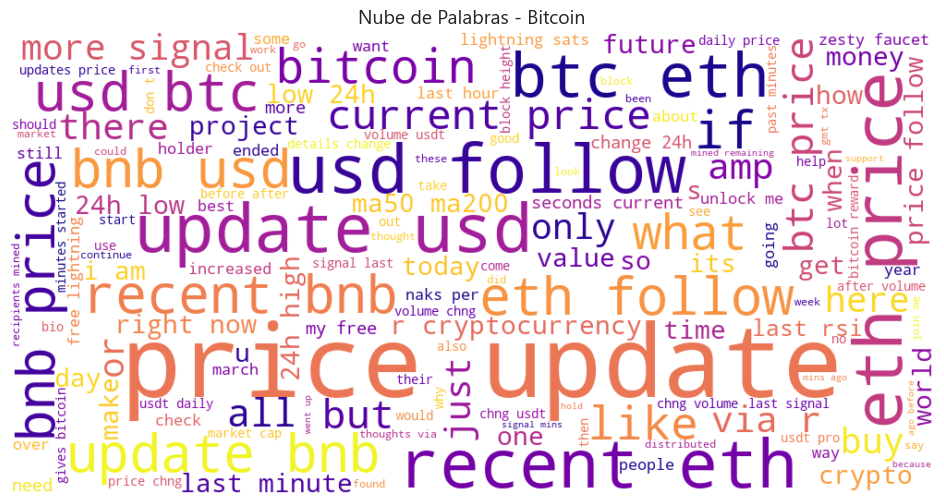

In [5]:
# Creamos la lista de stopwrds (palabras vac√≠as que vamos a omitir en nuestra gr√°fica)
stopwords = set(STOPWORDS)
stopwords = [
    "which", "on", "the", "to", "in", "of", "and", "for", "is", "it", "that", "with", "this", "at", "from",
    "by", "are", "be", "as", "was", "have", "has", "will", "can", "not", "you", "your", "our", "we", "they",
    "a", "new", "do"
]

# Unimos el texto del dataframe en una sola cadena
text = " ".join(df["text"].dropna())

# Normalizaci√≥n del texto
text = text.lower()  

# Eliminamos URLs, menciones y hashtags para no monopolizar la nube de palabras
text = re.sub(r"http\S+", "", text) 
text = re.sub(r"@\w+", "", text) 
text = re.sub(r"#\w+", "", text) 
text = re.sub(r"[$&+,:;=?@#|'<>.^*()%!-]", "", text)  

# Eliminamos m√∫ltiples espacios y espacios extra al principio y final
text = re.sub(r"\s+", " ", text).strip()


# Generamos la nube de palabras 
wordcloud = WordCloud(
    width=1000, height=500, 
    background_color="white", 
    stopwords=stopwords, 
    colormap="plasma", 
    max_words=150, 
    contour_width=2, 
    contour_color='black'
).generate(text)

# Mostramos el gr√°fico
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.title("Nube de Palabras - Bitcoin", fontsize=14, fontweight='bold')
plt.show()

La nube de palabras generada a partir del an√°lisis de los tweets sobre Bitcoin muestra claramente las palabras m√°s frecuentes en los mensajes. Al observarla, destacamos algunas de las palabras clave como **"price"**, **"update"**, **"usd"**, **"follow"**, **"bitcoin"**, **"eth"** (Ethereum)... etc.

Estas palabras reflejan claramente el enfoque de los usuarios en el precio de Bitcoin y las actualizaciones relacionadas con el mercado. Las menciones de "price" y "update" sugieren que muchos tweets se centran en el seguimiento y la actualizaci√≥n de precios. Adem√°s, t√©rminos como "usd" y "eth" destacan la conexi√≥n con otras criptomonedas y su relaci√≥n con el precio de Bitcoin.

La palabra **"follow"** tambi√©n aparece con frecuencia, lo que puede indicar que los usuarios est√°n promoviendo su cuenta o pidiendo a otros que sigan sus actualizaciones sobre el mercado de criptomonedas.

En resumen, la nube de palabras resalta el inter√©s por el precio de Bitcoin y las criptomonedas relacionadas, as√≠ como la interacci√≥n activa entre los usuarios a trav√©s de actualizaciones y seguimiento en redes sociales.


### 2. Emoticonos m√°s usados

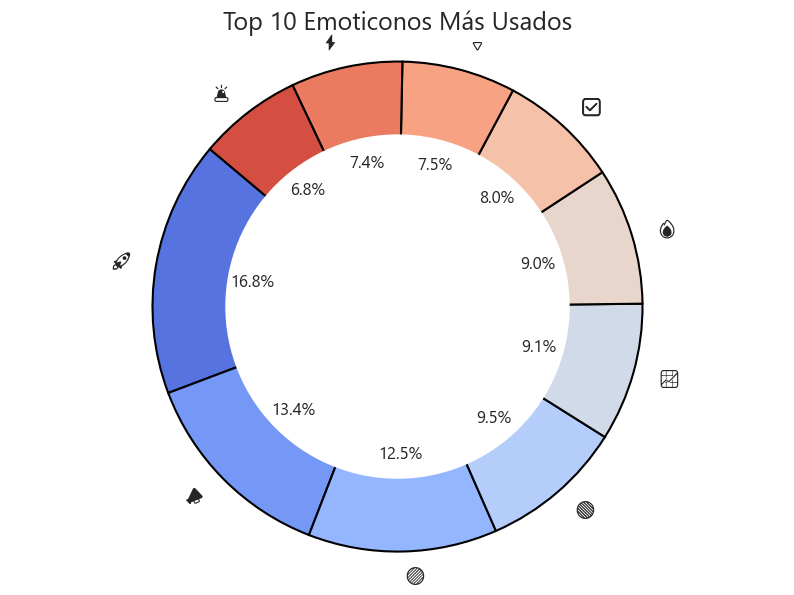

In [6]:
# leemos el dataset procesado
df = pd.read_csv('data/dataset_procesado.csv')

# Converitmos la columna 'Emoticons' a listas de emoticonos
df['Emoticons'] = df['Emoticons'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Filtramos las filas donde 'Emoticons' no sea una lista vac√≠a
non_empty_emoticons = df['Emoticons'].apply(lambda x: x if isinstance(x, list) and len(x) > 0 else None).dropna().explode()

# Contamos la frecuencia de cada emoticono
emoticon_counts = non_empty_emoticons.value_counts().head(10)

# Gr√°fico de Donut
plt.figure(figsize=(10, 7))

colors = sns.color_palette("coolwarm", n_colors=10)

plt.pie(emoticon_counts.values, labels=emoticon_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}, textprops={'fontsize': 12, 'family': 'Segoe UI Emoji'})
centre_circle = plt.Circle((0,0), 0.70, fc='white')

plt.gca().add_artist(centre_circle)

plt.title('Top 10 Emoticonos M√°s Usados', fontsize=18, family='Segoe UI Emoji')

plt.axis('equal') 
plt.show()


Gracias a este gr√°fico de Donut, podemos observar la distribuci√≥n de los emojis m√°s frecuentemente utilizados en los tweets. Los emojis m√°s destacados son: üöÄ, ‚ö°, üìà, üî•, ‚úÖ, entre otros.

La presencia de estos emojis en los tweets sobre Bitcoin refleja una comunidad activa y emocionalmente involucrada con el ecosistema de las criptomonedas. Los emojis m√°s utilizados transmiten emociones positivas, optimismo y entusiasmo, lo que sugiere que los usuarios tienden a celebrar los logros, compartir an√°lisis t√©cnicos y expresar confianza en el futuro de las criptomonedas.

### 3. Interacciones y menciones entre usuarios

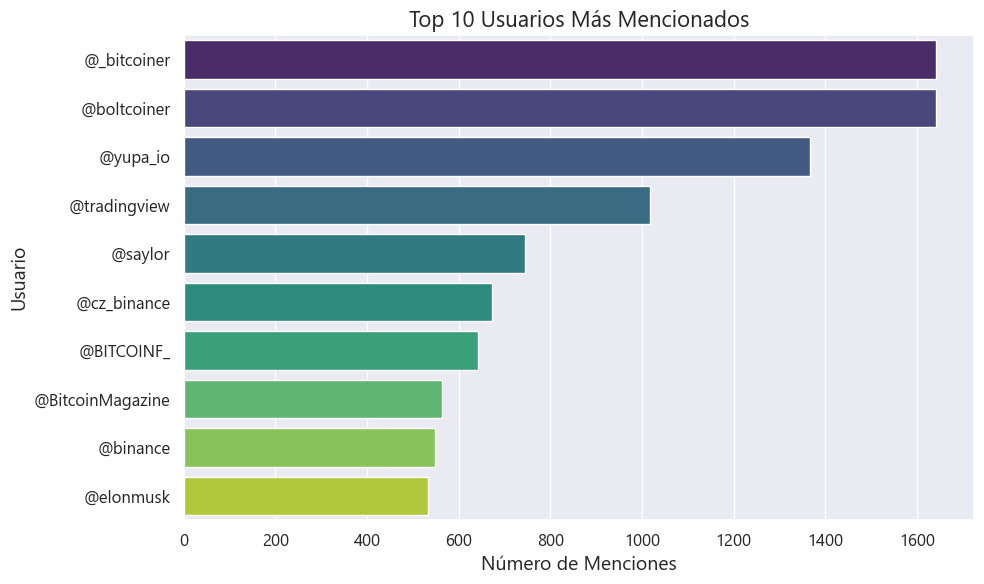

In [7]:
# Leemos el dataset procesado
df = pd.read_csv('data/dataset_procesado.csv')

# Filtramos las menciones de usuarios
df['Mentions'] = df['Mentions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explotamos la columna de menciones para crear un dataframe con menciones individuales
mentions = df['Mentions'].apply(lambda x: x if isinstance(x, list) else []).explode()

# Contamos la frecuencia de cada usuario mencionado
mention_counts = mentions.value_counts().head(10)

# Gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))

sns.barplot(y=mention_counts.index, x=mention_counts.values, palette='viridis', hue=mention_counts.index, legend=False)

plt.title('Top 10 Usuarios M√°s Mencionados', fontsize=16, family='Segoe UI Emoji')
plt.xlabel('N√∫mero de Menciones', fontsize=14)
plt.ylabel('Usuario', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, family='Segoe UI Emoji')

# Mostramos la gr√°fica
plt.tight_layout()  
plt.show()

Al observar las menciones m√°s frecuentes, destaca una fuerte presencia de usuarios relacionados con el mundo de las criptomonedas, como @boltcoiner, @yupa_io, @tradingview, @cz_binance, y @saylor. Estos nombres reflejan un enfoque claro hacia las plataformas de trading y las figuras influyentes en el ecosistema de Bitcoin y otras criptomonedas.

La menci√≥n recurrente de plataformas como @binance y @tradingview subraya el inter√©s de los usuarios en herramientas y servicios clave para el an√°lisis y el trading de criptomonedas. Adem√°s, el hecho de que varios usuarios que llevan el nombre "Bitcoin" en sus cuentas (como @_bitcoiner y @_bitcoiners) tambi√©n aparezcan con frecuencia, resalta la comunidad fuertemente orientada hacia esta moneda digital y sus seguidores m√°s comprometidos.

En resumen, la gr√°fica refleja un ecosistema digital en el que las menciones se concentran principalmente en las principales figuras y plataformas de criptomonedas, lo que pone de manifiesto la relevancia y el impacto de estos actores dentro de la conversaci√≥n social online sobre criptos.

### 4. Frecuencia de Hashtags

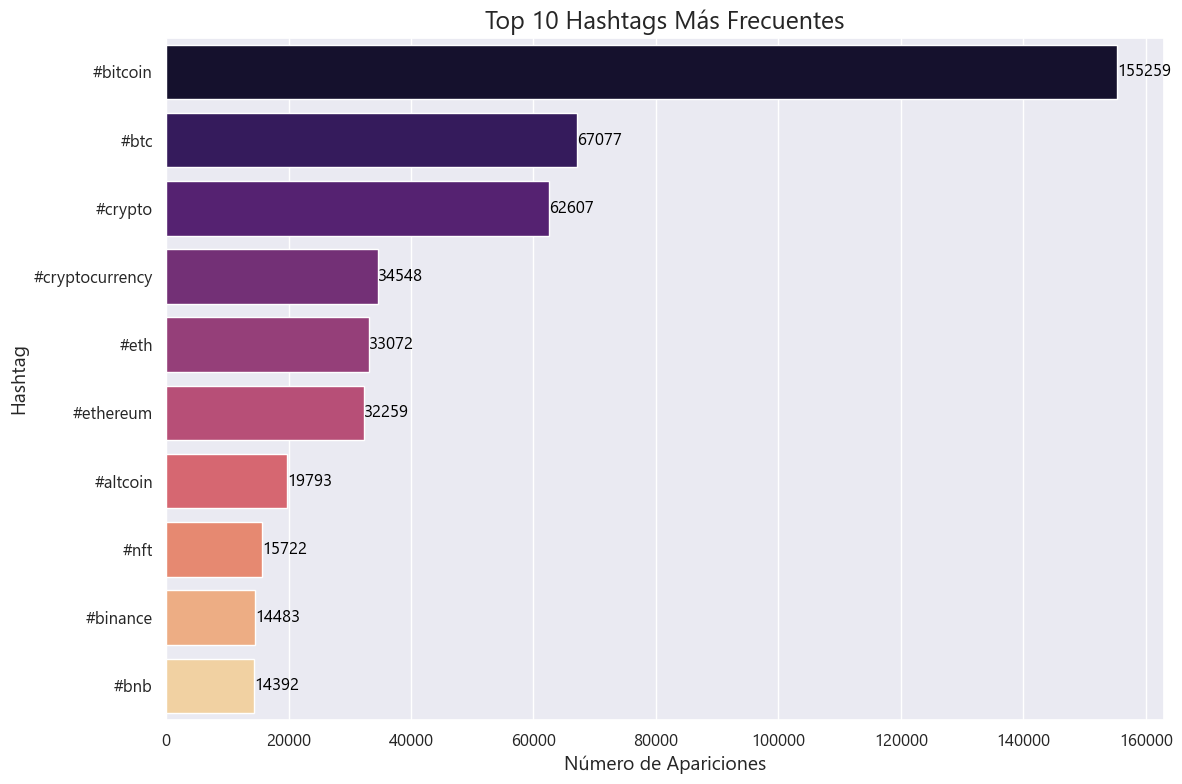

In [8]:
# Leemos el dataset procesado
df = pd.read_csv('data/dataset_procesado.csv')

# Filtramos los hashtags y los convertimos a min√∫sculas
df['Hashtags'] = df['Hashtags'].apply(lambda x: [tag.lower() for tag in ast.literal_eval(x)] if isinstance(x, str) else [])

# Explotamos la columna de hashtags para crear un dataframe con hashtags individuales
hashtags = df['Hashtags'].apply(lambda x: x if isinstance(x, list) else []).explode()

# Contamos la frecuencia de cada hashtag
hashtag_counts = hashtags.value_counts().head(10)

# Gr√°fico de barras horizontales
plt.figure(figsize=(12, 8))

sns.barplot(y=hashtag_counts.index, x=hashtag_counts.values, palette='magma', hue=hashtag_counts.index, legend=False)

plt.title('Top 10 Hashtags M√°s Frecuentes', fontsize=18, family='Segoe UI Emoji', fontweight='bold')
plt.xlabel('N√∫mero de Apariciones', fontsize=14)
plt.ylabel('Hashtag', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, family='Segoe UI Emoji')

for i, v in enumerate(hashtag_counts.values):
    plt.text(v + 3, i, str(v), color='black', fontsize=12, va='center')

# Mostramos la gr√°fica
plt.tight_layout()  
plt.show()

En este an√°lisis podemos observar que los hashtags m√°s utilizados por los usuarios sigue la misma din√°mica de inter√©s en las criptomonedas, nfts y todo lo relacionado. Podemos observar que los m√°s utilizados son #bitcoin #cripto #etherum etc.